In [4]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline
ia.seed(1)

image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/8/8e/Yellow-headed_caracara_%28Milvago_chimachima%29_on_capybara_%28Hydrochoeris_hydrochaeris%29.JPG")
image = ia.imresize_single_image(image, (298, 447))



timeout: The read operation timed out

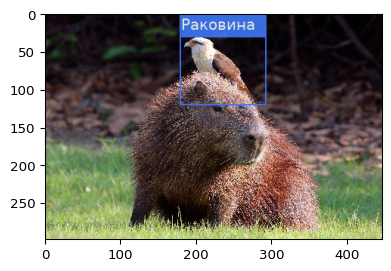

AttributeError: 'BoundingBoxesOnImage' object has no attribute 'extract_from_image'

In [9]:
bbs = BoundingBoxesOnImage([
#     BoundingBox(x1=0.2*447, x2=0.85*447, y1=0.3*298, y2=0.95*298, label='Трещина'),
    BoundingBox(x1=0.4*447, x2=0.65*447, y1=0.1*298, y2=0.4*298, label='Раковина')
], shape=image.shape)

ia.imshow(bbs.draw_on_image(image, color=(62,121,247), alpha=0.9,   size=2))
ia.imshow(bbs.extract_from_image(image))
# bbs.


In [3]:
import os

In [20]:
image_pathes = os.listdir(os.path.join("Aditional Dataset", 'vott-json-export (nedolivi)'))[1:]

In [ ]:
for im_path in image_pathes:
    image = imageio.imread(os.path.join("Training Dataset", 'vott-json-export (rakovini)', im_path))
    image_info = df[df['file_name'] == im_path]
    
    scaling_factor = 10
    image = ia.imresize_single_image(image,  \
                                    (float(image_info.image_width) // scaling_factor, \
                                     float(image_info.image_height) // scaling_factor))
    
    bbs = BoundingBoxesOnImage([
#         BoundingBox(x1=image_info.bbox_up_left_x / scaling_factor, x2=image_info.bbox_down_left_x / scaling_factor, y1=image_info.bbox_up_left_y  / scaling_factor, y2=298 / scaling_factor),
        BoundingBox(x1=image_info.bbox_up_left_x / scaling_factor, x2=image_info.bbox_down_left_x / scaling_factor, y1=image_info.bbox_up_left_y  / scaling_factor, y2=image_info.bbox_down_left_y / scaling_factor)
    ], shape=image.shape)

    

In [8]:
import pandas as pd
df = pd.read_csv('labels_csv_training_rakovini.csv')

In [ ]:
df

In [6]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [ ]:
for im_path in image_pathes:
    image = imageio.imread(os.path.join("Training Dataset", 'vott-json-export (rakovini)', im_path))
    image_info = df[df['file_name'] == im_path]
    print (im_path)
    scaling_factor = 10
    image = ia.imresize_single_image(image,  \
                                    (image.shape[0] // scaling_factor, \
                                     image.shape[1] // scaling_factor))
    print (image.shape)


    ia.imshow(image)
    print (image_info.bbox_cord_up_left_x / scaling_factor)
    print (image_info.bbox_cord_down_left_x / scaling_factor)
    
    bbs = BoundingBoxesOnImage([
                BoundingBox(x1=image_info.bbox_cord_up_left_x.values / scaling_factor, \
                            x2=image_info.bbox_cord_down_right_x.values / scaling_factor, \
                            y1=image_info.bbox_cord_up_left_y.values  / scaling_factor, \
                            y2=image_info.bbox_cord_down_right_y.values / scaling_factor)
            ], shape=image.shape)
    
    ia.imshow(bbs.draw_on_image(image, size=2))

#     image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)
    
#     ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))
    for i in range(5):
        image_aug, bbs_aug = aug(image=image, bounding_boxes=bbs)
        ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))
    
    break

In [ ]:
from imgaug import augmenters as iaa 
ia.seed(1)

seq = iaa.Sequential([
    iaa.GammaContrast(1.5),
#     iaa.BilateralBlur(),
    iaa.AdditiveGaussianNoise(),
    iaa.HorizontalFlip()
#     iaa.Affine(translate_percent={"x": 0.1}, scale=0.8)
])

In [ ]:
aug = iaa.SomeOf(2, [
    iaa.Affine(rotate=45),
    iaa.AdditiveGaussianNoise(scale=0.05*255),
    iaa.Add(10, per_channel=True),
    iaa.Sharpen(alpha=0.5)
], random_order=True)

In [1]:
import cv2
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [17]:
import pandas as pd
df = pd.read_csv('labels_csv_additional_nedolivi.csv')

In [12]:
from tqdm import tqdm

In [16]:
# for im_path in tqdm(image_pathes):
#     image = imageio.imread(os.path.join("Training Dataset", 'vott-json-export (rakovini)', im_path))
#     image_info = df[df['file_name'] == im_path]
# #     print (im_path)
    
#     image = cv2.resize(image, (640,640))
# #     ia.imshow(image)
# #     print (image.shape)
#     im_laplace = cv2.Laplacian(image / 255, cv2.CV_64F)
# #     print (im_laplace.shape)
# #     ia.imshow(im_laplace)
    
#     path_ = os.path.join("Training Dataset", 'laplace_transform (rakovini)', im_path)
#     cv2.imwrite(path_, im_laplace * 255)
    
    


In [21]:
for im_path in tqdm(image_pathes):
    image = imageio.imread(os.path.join('Aditional Dataset', 'vott-json-export (nedolivi)', im_path))
    image_info = df[df['file_name'] == im_path]
#     print (im_path)
    
    image = cv2.resize(image, (640,640))
#     ia.imshow(image)
#     print (image.shape)
    im_laplace = cv2.Laplacian(image / 255, cv2.CV_64F)
#     print (im_laplace.shape)
#     ia.imshow(im_laplace)
    
    path_ = os.path.join("Aditional Dataset", 'laplace transform (nedolivi)', im_path)
    cv2.imwrite(path_, im_laplace * 255)
    
    


 98%|████████████████████████████████████████████████████████████████████████████████▊ | 65/66 [01:09<00:01,  1.06s/it]


ValueError: Could not find a format to read the specified file in single-image mode

In [22]:
image_pathes[-1]

'Thumbs.db'

In [ ]:
for im_path in image_pathes[2:5]:
    image = imageio.imread(os.path.join("Training Dataset", 'vott-json-export (rakovini)', im_path))
    image_info = df[df['file_name'] == im_path]
    print (im_path)
    scaling_factor = 5
    image = ia.imresize_single_image(image,  \
                                    (image.shape[0] // scaling_factor, \
                                     image.shape[1] // scaling_factor))
    print (image.shape)

    bbs = BoundingBoxesOnImage([
                BoundingBox(x1=image_info.bbox_cord_up_left_x.values / scaling_factor, \
                            x2=image_info.bbox_cord_down_right_x.values / scaling_factor, \
                            y1=image_info.bbox_cord_up_left_y.values  / scaling_factor, \
                            y2=image_info.bbox_cord_down_right_y.values / scaling_factor)
            ], shape=image.shape)
    
    ia.imshow(bbs.draw_on_image(image, size=2))

    
#     ia.imshow(image)
    
    im_laplace = cv2.Laplacian(image / 255,cv2.CV_64F)
    
    ia.imshow(bbs.draw_on_image(im_laplace, size=2))